## Run default configurations
Print out Psats, NET, NET_wafer

In [85]:
# See what yaml files are locally available.
!ls *.yaml

CHLAT_20210605.yaml    SAT_pole_20210605.yaml SPLAT_20210605.yaml


In [86]:
# Standard imports
import numpy as np
import yaml
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 20]

# bolo-calc import
from bolo import Top

yamlfiles = ['CHLAT_20210605.yaml','SPLAT_20210605.yaml','SAT_pole_20210605.yaml']

### Read a yaml file into a python dictionary
then run bolocalc on it.

In [87]:
yamlfile = yamlfiles[0]

for yamlfile in yamlfiles:
    dd = yaml.safe_load(open(yamlfile))
    version_date = str(dd['version']['date'])
    version_telescope = str(dd['version']['name'])
    print('{0:8s}   Psat(pW)   NET    NET_wafer'.format(version_telescope))
    del dd['version']

    # location of atmosphere file
    dd['sim_config']['config_dir'] = '../../bolo-calc/config'

    top = Top(**dd)
    top.run()
    for chan in top.instrument.tables.keys():
        if chan.split('_')[0] == 'cam' :
            chname = chan.split('_')[2] + '_' + chan.split('_')[3]
            psat = top.instrument.tables[chan]['P_sat'][0]
            net = top.instrument.tables[chan]['NET'][0]
            netwafer = top.instrument.tables[chan]['NET_arr'][0]
            print('{0:5s} : {1:8.2f} {2:8.2f} {3:8.2f}'.format(chname,psat,net,netwafer) )
    print(' ')

CHLAT      Psat(pW)   NET    NET_wafer
LF_1  :     0.69   276.86    31.59
LF_2  :     3.63   226.54    25.85
MF_1  :     4.14   259.23     9.86
MF_2  :    12.88   290.68    11.06
UHF_1 :    37.51   666.77    24.34
UHF_2 :    55.28  1660.58    60.62
 
SPLAT      Psat(pW)   NET    NET_wafer
ULF_1 :     0.41   329.25    50.09
LF_1  :     0.69   278.58    31.79
LF_2  :     4.30   268.29    30.61
MF_1  :     4.66   285.15    10.85
MF_2  :    11.52   265.16    10.09
UHF_1 :    29.10   537.05    19.60
UHF_2 :    39.99  1233.60    45.03
 
SAT_pole   Psat(pW)   NET    NET_wafer
LF_1  :     1.41   169.24    22.00
LF_2  :     6.13   204.13    26.53
MF1_1 :     7.39   289.08    18.85
MF1_2 :    12.21   279.36    18.22
MF2_1 :     7.66   248.17    16.18
MF2_2 :    13.29   297.25    19.38
UHF_1 :    29.96   610.44    22.28
UHF_2 :    39.16  1440.43    52.58
 


In [88]:
dd['instrument']['camera_config']['elements']['cam_1']['chan_config']['elements']['LF_1']['band_center']

25.75

CHLAT      Psat(pW)   NET    NET_wafer


<ipython-input-90-674eca884b3f>:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4,1,1)
<ipython-input-90-674eca884b3f>:53: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4,1,2)
<ipython-input-90-674eca884b3f>:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and re

SPLAT      Psat(pW)   NET    NET_wafer
SAT_pole   Psat(pW)   NET    NET_wafer


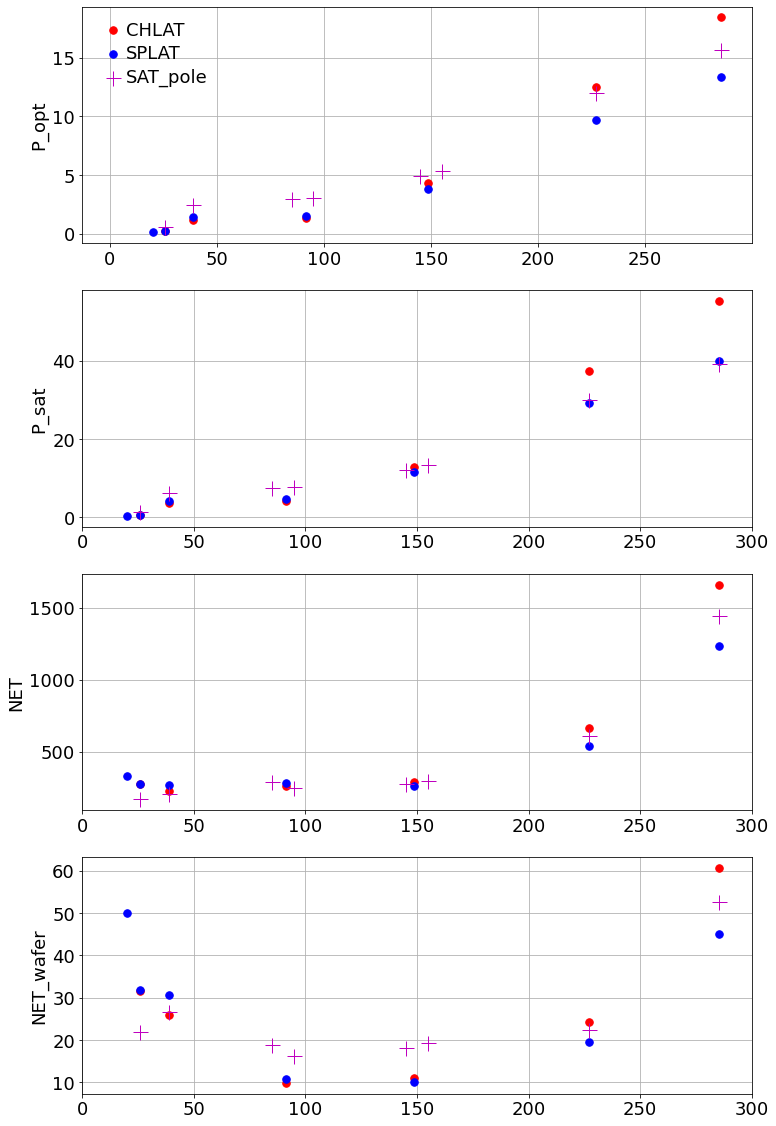

In [90]:
plt.clf()

data = {}

yfrac = 0.9
for yamlfile in yamlfiles:
    data[yamlfile] = {}
    dd = yaml.safe_load(open(yamlfile))
    version_date = str(dd['version']['date'])
    version_telescope = str(dd['version']['name'])
    print('{0:8s}   Psat(pW)   NET    NET_wafer'.format(version_telescope))
    del dd['version']

    # location of atmosphere file
    dd['sim_config']['config_dir'] = '../../bolo-calc/config'

    top = Top(**dd)
    top.run()
    for chan in top.instrument.tables.keys():
        if chan.split('_')[0] == 'cam' :
            chname = chan.split('_')[2] + '_' + chan.split('_')[3]
            data[yamlfile][chname] = {}
            popt = top.instrument.tables[chan]['opt_power'][0]
            data[yamlfile][chname]['popt'] = popt
            psat = top.instrument.tables[chan]['P_sat'][0]
            data[yamlfile][chname]['psat'] = psat
            net = top.instrument.tables[chan]['NET'][0]
            data[yamlfile][chname]['net'] = net
            netwafer = top.instrument.tables[chan]['NET_arr'][0]
            data[yamlfile][chname]['netwafer'] = netwafer
            data[yamlfile][chname]['bandcenter'] = dd['instrument']['camera_config']['elements']['cam_1']['chan_config']['elements'][chname]['band_center']

            
# Plot things vs frequency for each telescope
    if version_telescope == 'CHLAT':
        pointtype = '.r'
    elif version_telescope == 'SPLAT':
        pointtype = '.b'
    else:
        pointtype = '+m'
    

    for chname in data[yamlfile].keys():
        nu = data[yamlfile][chname]['bandcenter']
        #
        plt.subplot(4,1,1)
        plt.plot(nu, data[yamlfile][chname]['popt'],pointtype, markersize=15 )
        plt.ylabel('P_opt')

        
        plt.grid()
        #
        plt.subplot(4,1,2)
        plt.plot(nu, data[yamlfile][chname]['psat'],pointtype, markersize=15 )
        plt.ylabel('P_sat')
        plt.xlim(0,300)
        plt.grid()
        #
        plt.subplot(4,1,3)
        plt.plot(nu, data[yamlfile][chname]['net'],pointtype, markersize=15 )
        plt.ylabel('NET')
        plt.xlim(0,300)
        plt.grid()
        #
        plt.subplot(4,1,4)
        plt.plot(nu, data[yamlfile][chname]['netwafer'],pointtype, markersize=15 )
        plt.ylabel('NET_wafer')
        plt.xlim(0,300)
        plt.grid()
        #
    
    plt.subplot(4,1,1)
    ymin,ymax = plt.ylim()
    xmin,xmax = plt.ylim()
    xval = xmin+0.1*(xmax-xmin)
    yval = ymin+yfrac*(ymax-ymin)
    plt.plot(xval,yval,pointtype,markersize=15)
    plt.text(xval+0.3*(xmax-xmin),yval,version_telescope,verticalalignment='center')
    yfrac = yfrac-0.1
    

In [71]:
top.instrument.tables.keys()

dict_keys(['cam_1_LF_1_sims', 'cam_1_LF_2_sims', 'cam_1_MF1_1_sims', 'cam_1_MF1_2_sims', 'cam_1_MF2_1_sims', 'cam_1_MF2_2_sims', 'cam_1_UHF_1_sims', 'cam_1_UHF_2_sims', 'optical'])

In [32]:
top.instrument.tables['cam_1_ULF_sims'].keys()

['effic',
 'opt_power',
 'P_sat',
 'Flink',
 'G',
 'tel_rj_temp',
 'sky_rj_temp',
 'NEP_bolo',
 'NEP_read',
 'NEP_ph',
 'NEP',
 'NET',
 'NET_corr',
 'corr_fact',
 'NET_arr']